In [1]:
#importing required packages
import pandas as pd
from pandas import Series, DataFrame
import datetime
import calendar
from pylab import rcParams

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib.colors import LinearSegmentedColormap

import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import scipy
plt.style.use('ggplot')
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
data= pd.read_csv("E://Simplilearn//Data Science with Python//Projects//311-NYC//311_Service_Requests.csv")

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
cols_to_drop = ['Agency','Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',\
                'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name','School Number',\
                'School Region','School Code','School Phone Number','School Address','School City','School State','School Zip',\
                'School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location',\
                'Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name',\
                'Ferry Direction','Ferry Terminal Name','Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)',\
                'Due Date','Resolution Action Updated Date','Community Board','Facility Type','Resolution Description',\
                'Descriptor', 'Location', 'Incident Zip', 'Latitude', 'Longitude']

In [5]:
#dropping extra columns and rows

data.drop(axis=1,labels=cols_to_drop,inplace=True)
data = data[data['Status']=='Closed']
data.drop(['Status'], inplace=True, axis=1)
data = data[(data['City'].notnull())]

In [6]:
data.head(2)

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,City,Borough
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,MANHATTAN
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,Street/Sidewalk,ASTORIA,QUEENS


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297965 entries, 0 to 300697
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unique Key      297965 non-null  int64 
 1   Created Date    297965 non-null  object
 2   Closed Date     297965 non-null  object
 3   Complaint Type  297965 non-null  object
 4   Location Type   297906 non-null  object
 5   City            297965 non-null  object
 6   Borough         297965 non-null  object
dtypes: int64(1), object(6)
memory usage: 18.2+ MB


In [8]:
data['Created Date'] = data['Created Date'].astype('datetime64[ns]')
data['Closed Date'] = data['Closed Date'].astype('datetime64[ns]')
data[['Created Date', 'Closed Date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297965 entries, 0 to 300697
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Created Date  297965 non-null  datetime64[ns]
 1   Closed Date   297965 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 6.8 MB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297965 entries, 0 to 300697
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unique Key      297965 non-null  int64         
 1   Created Date    297965 non-null  datetime64[ns]
 2   Closed Date     297965 non-null  datetime64[ns]
 3   Complaint Type  297965 non-null  object        
 4   Location Type   297906 non-null  object        
 5   City            297965 non-null  object        
 6   Borough         297965 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 18.2+ MB


In [10]:
data['RequestClosingTime'] = data['Closed Date'] - data['Created Date']

In [11]:
data.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,City,Borough,RequestClosingTime
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,MANHATTAN,00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,ASTORIA,QUEENS,01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,BRONX,BRONX,04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,BRONX,BRONX,07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,ELMHURST,QUEENS,03:27:02


In [12]:
# View Prcoessing Time data that is negative
data[data['RequestClosingTime']<datetime.timedelta(0,0,0)].head(3)

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,City,Borough,RequestClosingTime


In [13]:
# Remove all data from df that have negative Processing Time
data = data[data['RequestClosingTime']>=datetime.timedelta(0,0,0)]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297965 entries, 0 to 300697
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Unique Key          297965 non-null  int64          
 1   Created Date        297965 non-null  datetime64[ns] 
 2   Closed Date         297965 non-null  datetime64[ns] 
 3   Complaint Type      297965 non-null  object         
 4   Location Type       297906 non-null  object         
 5   City                297965 non-null  object         
 6   Borough             297965 non-null  object         
 7   RequestClosingTime  297965 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(4), timedelta64[ns](1)
memory usage: 20.5+ MB


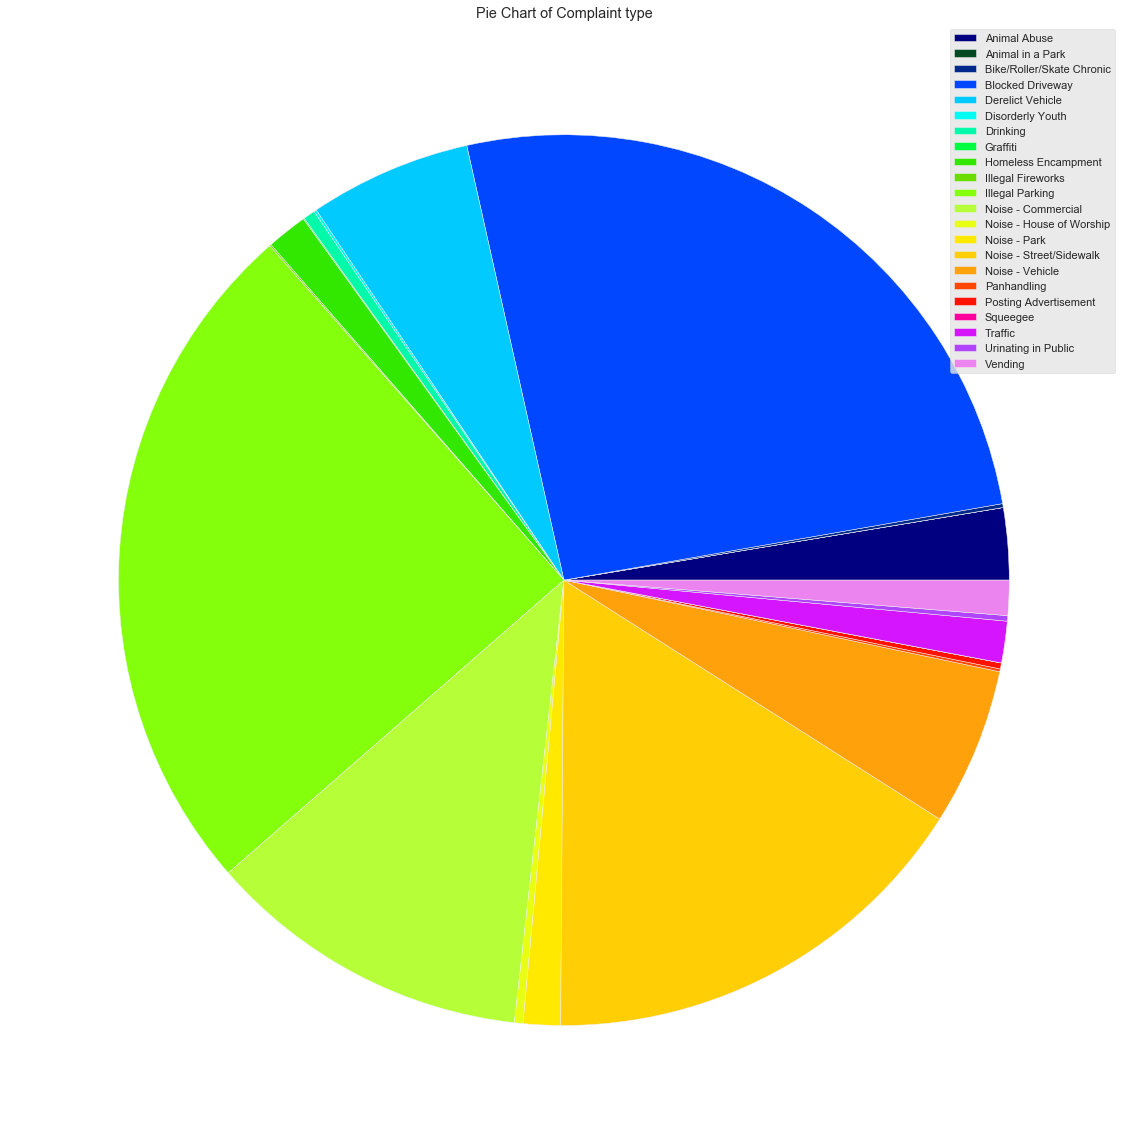

STATS
----------------------
count               297965
unique                  22
top       Blocked Driveway
freq                 76735
Name: Complaint Type, dtype: object
----------------------
Complaint Type
Animal in a Park                 1
Squeegee                         4
Graffiti                       113
Illegal Fireworks              168
Disorderly Youth               286
Panhandling                    305
Bike/Roller/Skate Chronic      422
Urinating in Public            592
Posting Advertisement          647
Noise - House of Worship       929
Drinking                      1272
Vending                       3792
Noise - Park                  4014
Homeless Encampment           4409
Traffic                       4491
Animal Abuse                  7765
Noise - Vehicle              17026
Derelict Vehicle             17539
Noise - Commercial           35183
Noise - Street/Sidewalk      47978
Illegal Parking              74294
Blocked Driveway             76735
Name: Unique Key, d

In [15]:
#Provide major insights/patterns that you can offer in a visual format (atleast 4)

# 1. Complaint Type Analysis

freq_complaint = data.groupby('Complaint Type').agg('count')['Unique Key']

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(freq_complaint))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

labels=freq_complaint.index
plt.title('Pie Chart of Complaint type')
plt.pie(x=freq_complaint.values.astype('float64'), colors = colorst)
ax.legend(labels, loc = 'upper right')
plt.tight_layout()
plt.show()

print("STATS\n----------------------\n" , data['Complaint Type'].describe() , sep='')

print('----------------------')
print(data.groupby('Complaint Type').agg('count')['Unique Key'].sort_values())


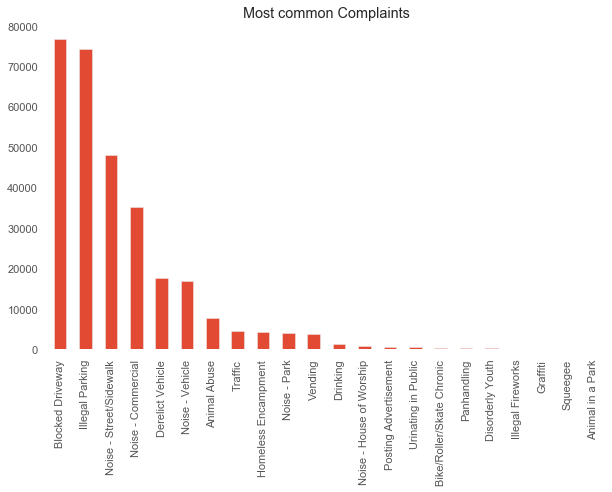

In [16]:
# 2. the most frequent and least frequent complaints in NYC in 2015

(data['Complaint Type'].value_counts()).plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')

plt.box(False)

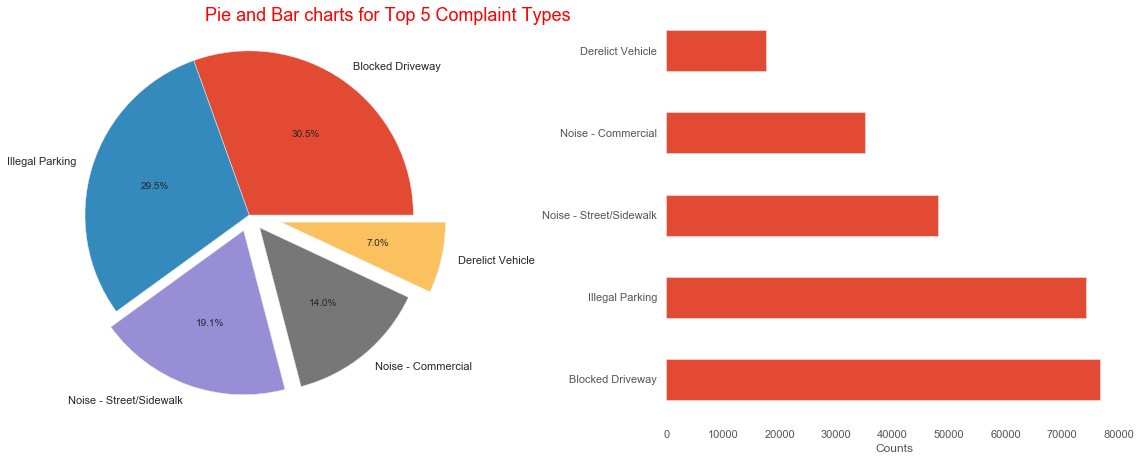

In [17]:
# 3. Top 5 complaints types in NYC in 2015

most_complaint_type = pd.value_counts(data['Complaint Type'])

fig,ax = plt.subplots(1,2, figsize=[16,6.5])
fig.suptitle('Pie and Bar charts for Top 5 Complaint Types', fontsize=18, color='red', ha='right')

most_complaint_type.nlargest().plot(kind='pie',autopct='%.1f%%',ax=ax[0],explode=(0,0,0.1,0.1,0.2))
ax[0].set(ylabel='')

most_complaint_type.nlargest().plot.barh(x='Complaint Type',ax=ax[1])
ax[1].set_xlabel('Counts')
plt.tight_layout(1.2)

plt.box(False)

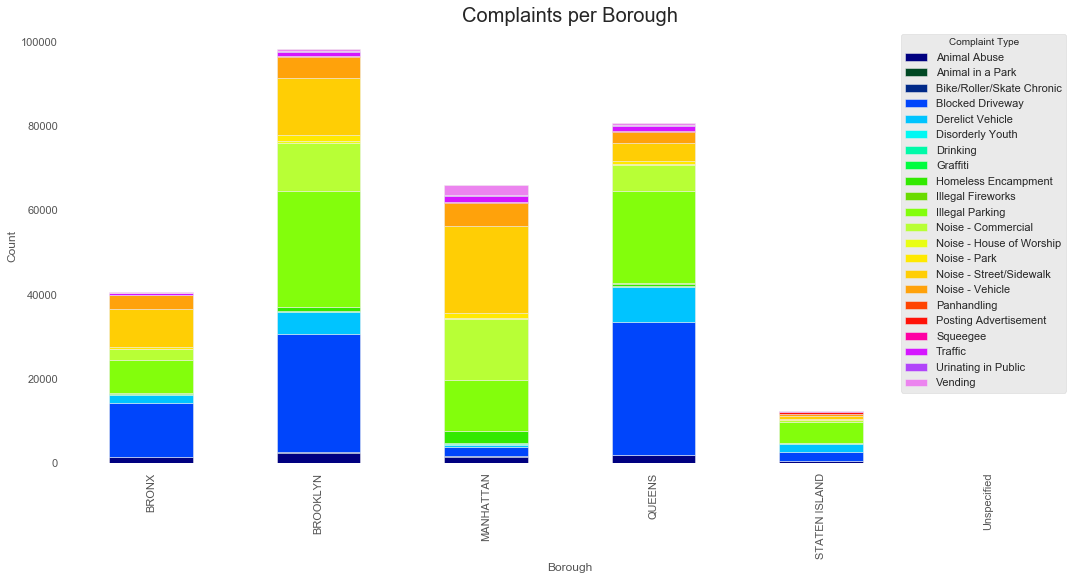

In [18]:
#4. Display the complaint type and Borough together

mplaintTypeBorough =data.groupby(['Borough','Complaint Type']).size()

clarity_color_table = pd.crosstab(index=data["Borough"], 
                          columns=data["Complaint Type"])

cmap1 = LinearSegmentedColormap.from_list("my_colormap", colorst)

clarity_color_table.plot(kind="bar", figsize=(18,8),stacked=True, colormap=cmap1)
plt.title('Complaints per Borough',fontsize=20)
plt.ylabel('Count')
plt.box(False)
plt.show()

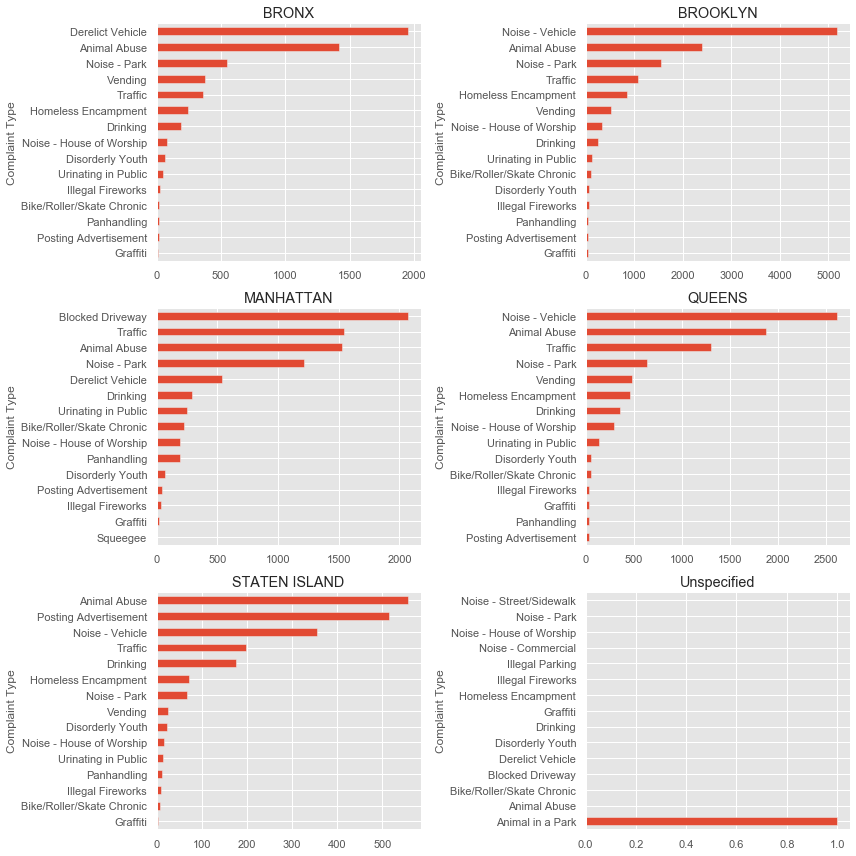

In [19]:
# Visualization of most Complaints per Borough
borough_comp = data.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3

fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

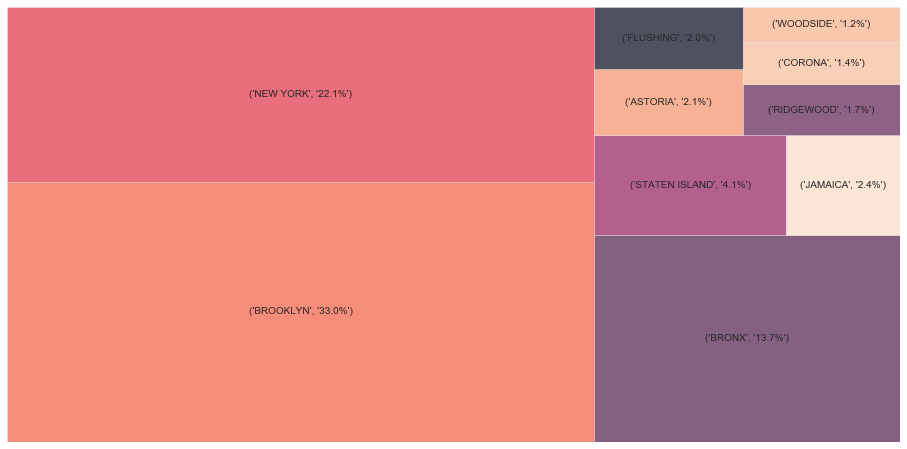

In [20]:
#5. Citywise Complaints Analysis - Top 10

citywise_complaints = pd.DataFrame(data['City'].value_counts()[:10])
percent100 = data['City'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

#pip install squarify
import squarify

fig = plt.gcf()
fig.set_size_inches(16, 8)
label=zip(list(citywise_complaints.index),percent100)
squarify.plot(sizes=citywise_complaints['City'], label=label, alpha=0.7)
plt.axis('off')
plt.show()

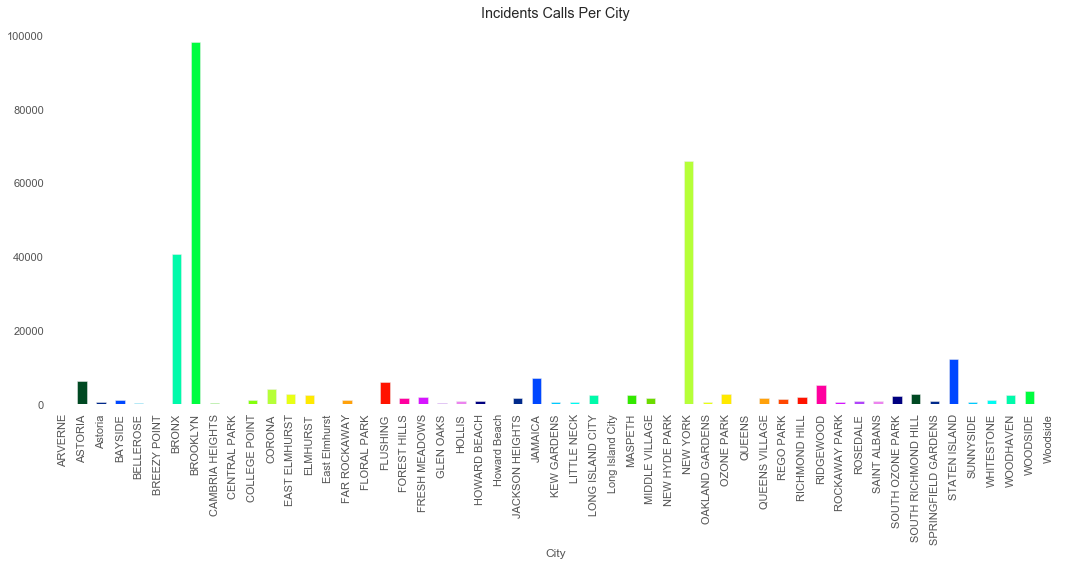

In [21]:
#6. Incidents Calls Per City

data.groupby('City').size().plot(kind='bar', color = colorst, figsize=(18,7), title=('Incidents Calls Per City'))
plt.box(False)

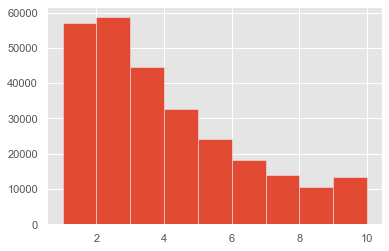

In [22]:
#complaint types based on the average ‘Request_Closing_Time'

data['RequestClosingHours'] = data['RequestClosingTime'].astype('timedelta64[h]')+1

mean = data['RequestClosingHours'].mean()
std = data['RequestClosingHours'].std()

dataplot = data[ ((data['RequestClosingHours']-mean)/std) < 1]
dataplot['RequestClosingHours'].hist(bins=9)

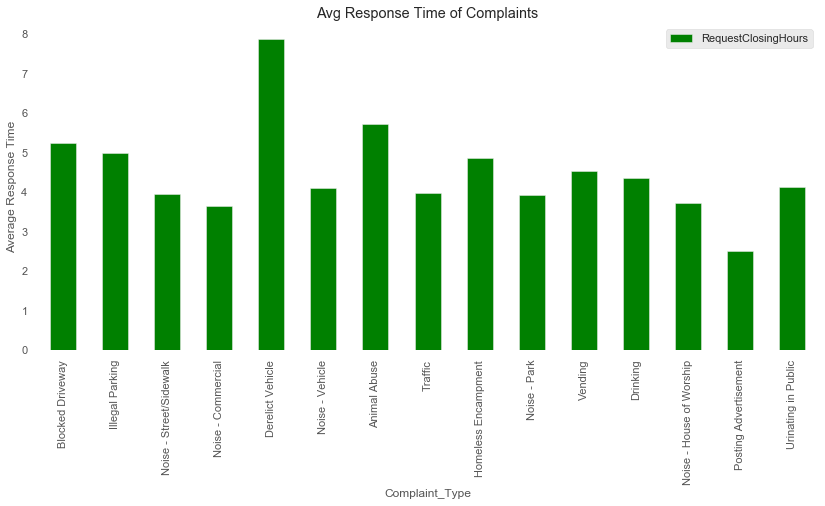

In [23]:
#8.Average Response Time of Complaints

import matplotlib.ticker as ticker

var = data[['RequestClosingHours', 'Complaint Type']].groupby('Complaint Type').mean()
frequent = data['Complaint Type'].value_counts()

var = var.loc[frequent.index]

var.head(15).plot(kind='bar', figsize=(14,6), color = 'green')

plt.xlabel('Complaint_Type')
plt.ylabel('Average Response Time')
plt.title("Avg Response Time of Complaints")
tick_spacing = 2
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.box(False)

In [24]:
#complaint types based on the average ‘Request_Closing_Time' based on complaint type grouped under different location

data['RequestClosingTime1'] = data['RequestClosingTime'].values.astype(np.int64)

newss = data.groupby(['Location Type' , 'Complaint Type']).mean()

newss.RequestClosingTime1.apply(pd.to_timedelta)

Location Type        Complaint Type     
Bridge               Homeless Encampment   03:49:09.500000
Club/Bar/Restaurant  Drinking              04:32:44.923287
                     Noise - Commercial    03:03:43.846574
                     Urinating in Public          07:55:12
Commercial           Animal Abuse          05:20:33.967741
                                                 ...      
Street/Sidewalk      Urinating in Public   03:17:06.835443
                     Vending               04:01:34.806483
Subway Station       Animal Abuse          03:02:08.181818
                     Urinating in Public   01:09:07.666666
Vacant Lot           Derelict Vehicle      07:28:26.129870
Name: RequestClosingTime1, Length: 69, dtype: timedelta64[ns]

In [25]:
#statistical test - Hypothesis Testing

#1. Whether the average response time across complaint types is similar or not (overall) - ANOVA

#Ho: The average response time across complaint types is not similar.
#Ha: The average response time across complaint types is similar.

data.columns = data.columns.str.replace('Complaint Type','Complaint_Type')
data.columns = data.columns.str.replace('Location Type','Location_Type')

mod = ols('RequestClosingTime1 ~ Complaint_Type', data = data).fit()
print(sm.stats.anova_lm(mod))

                      df        sum_sq       mean_sq           F  PR(>F)
Complaint_Type      21.0  5.214914e+30  2.483292e+29  538.297063     0.0
Residual        297943.0  1.374482e+32  4.613238e+26         NaN     NaN


In [26]:
#2.Are the type of complaint or service requested and location related? - CHI-SQUARE

#Ho: The type of complaint or service requested and location are not related.
#Ha: The type of complaint or service requested and location are related.

contingency_table = pd.crosstab(data['Location_Type'], data['Complaint_Type'])
chisq_statistic, p_value, ddof, expected = chi2_contingency(contingency_table.values)
print('Chi square statistic: {}, p-value: {}'.format(chisq_statistic,p_value))

Chi square statistic: 1325898.8841401357, p-value: 0.0
